# **Movie Rating Prediction**

### Problem Objective :

-Build a model that predicts the rating of a movie based on features like genre, director, and actors.

-The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.


# Hi!!!

<img src="https://media.giphy.com/media/3ogwFGEHrVxusDbDjO/giphy.gif">

## Let's Get Started >>>

## Importing all the libraries needed

In [27]:
#Data Analysis Libraries
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Data Acquisition

In [46]:
movie_data = pd.read_csv(r"C:\Users\Subhajit Nath\Documents\DataSets\Movie Rating Prediction\movies.dat", sep='::', engine='python', encoding='latin1')
movie_data.columns =['MovieIDs','MovieName','Category']
movie_data.dropna(inplace=True)

ratings_data = pd.read_csv(r"C:\Users\Subhajit Nath\Documents\DataSets\Movie Rating Prediction\ratings.dat",sep='::', engine='python')
ratings_data.columns =['ID','MovieID','Ratings','TimeStamp']
ratings_data.dropna(inplace=True)

user_data = pd.read_csv(r"C:\Users\Subhajit Nath\Documents\DataSets\Movie Rating Prediction\users.dat",sep='::',engine='python')
user_data.columns =['UserID','Gender','Age','Occupation','Zip-code']
user_data.dropna(inplace=True)

#### First 10 Rows of the Datasets

In [47]:
movie_data.head(10)

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller
5,7,Sabrina (1995),Comedy|Romance
6,8,Tom and Huck (1995),Adventure|Children's
7,9,Sudden Death (1995),Action
8,10,GoldenEye (1995),Action|Adventure|Thriller
9,11,"American President, The (1995)",Comedy|Drama|Romance


In [48]:
ratings_data.head(10)

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268
5,1,1287,5,978302039
6,1,2804,5,978300719
7,1,594,4,978302268
8,1,919,4,978301368
9,1,595,5,978824268


In [49]:
user_data.head(10)

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117
5,7,M,35,1,06810
6,8,M,25,12,11413
7,9,M,25,17,61614
8,10,F,35,1,95370
9,11,F,25,1,04093


In [50]:
data = pd.concat([movie_data, ratings_data, user_data], axis=1)
data.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


## Exploratory Data Analysis (EDA) for the users dataset

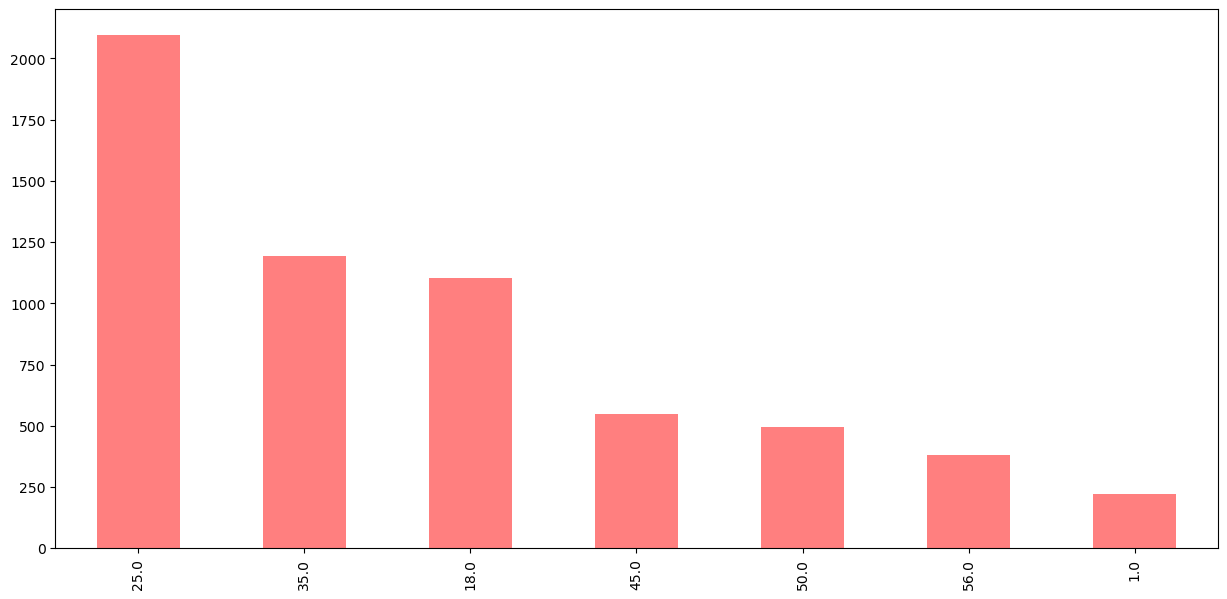

In [70]:
data['Age'].value_counts().plot(kind='bar', color= 'red',alpha=0.5,figsize=(15,7))
plt.show()

Text(0.5, 0, 'Age')

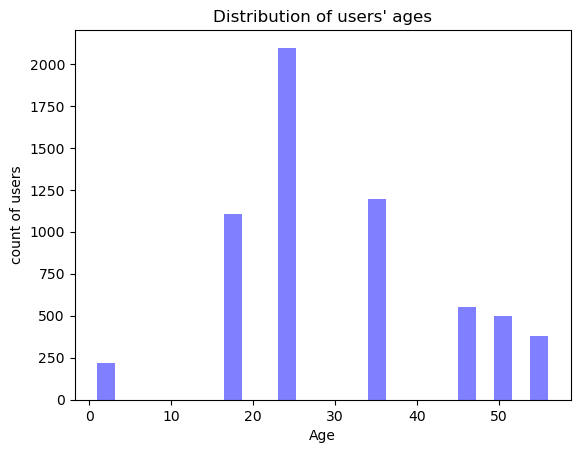

In [81]:
data.Age.plot.hist(bins=25,color='blue', alpha= 0.5)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('Age')

In [66]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
data['age_group'] = pd.cut(data.Age, range(0, 81, 10), right=False, labels=labels)
data[['Age', 'age_group']].drop_duplicates()[:10]

,Age,age_group
0,56.0,50-59
1,25.0,20-29
2,45.0,40-49
4,50.0,50-59
5,35.0,30-39
16,18.0,10-19
17,1.0,0-9
6039,NaN,NaN


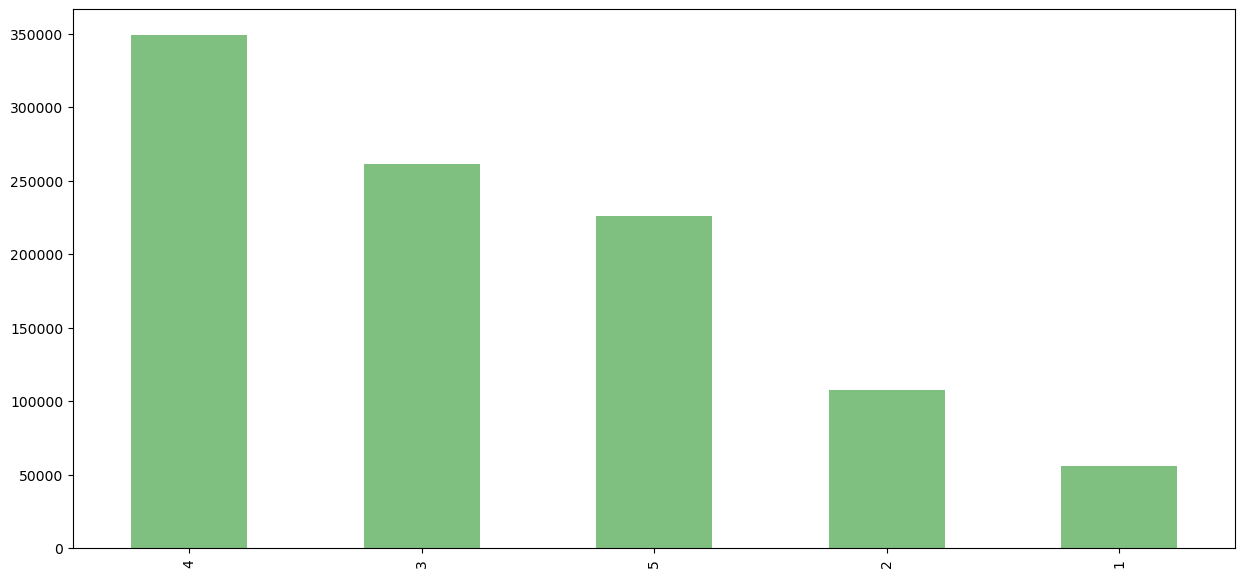

In [69]:
data['Ratings'].value_counts().plot(kind='bar', color='green',alpha=0.5,figsize=(15,7))
plt.show()

## Only You(1994)

In [82]:
groupedby_movieName = data.groupby('MovieName')
groupedby_rating = data.groupby('Ratings')
groupedby_uid = data.groupby('UserID')

In [83]:
movies = data.groupby('MovieName').size().sort_values(ascending=True)[:1000]
print(movies)

MovieName
$1,000,000 Duck (1971)                   1
Only Angels Have Wings (1939)            1
Only You (1994)                          1
Open Season (1996)                       1
Open Your Eyes (Abre los ojos) (1997)    1
                                        ..
Toy Story 2 (1999)                       1
Toys (1992)                              1
Total Eclipse (1995)                     1
Trading Places (1983)                    1
Tom & Viv (1994)                         1
Length: 1000, dtype: int64


In [84]:
onlyyou_data = groupedby_movieName.get_group('Total Eclipse (1995)')
onlyyou_data.shape

(1, 13)

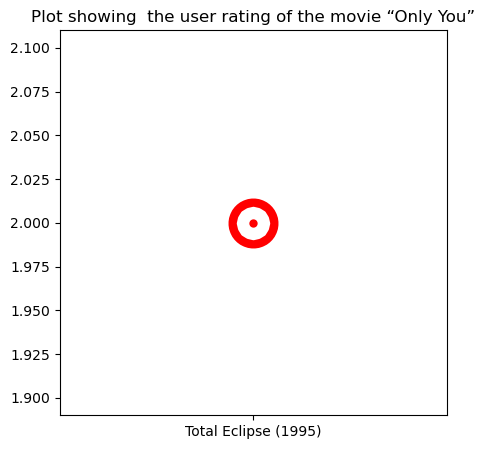

In [94]:
#Find and visualize the user rating of the movie “Only You”
plt.figure(figsize=(5,5))
plt.scatter(onlyyou_data['MovieName'],onlyyou_data['Ratings'], color='red', linewidth=30)
plt.title('Plot showing  the user rating of the movie “Only You”')
plt.show()

In [124]:
#The viewership of the movie “Only You” by age group
onlyyou_data[['MovieName','age_group']]

,MovieName,age_group
199,Total Eclipse (1995),30-39


,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code,age_group
763,774.0,Wend Kuuni (God's Gift) (1982),Drama,9,3253,4,978226165,765.0,M,25.0,17.0,74467,20-29


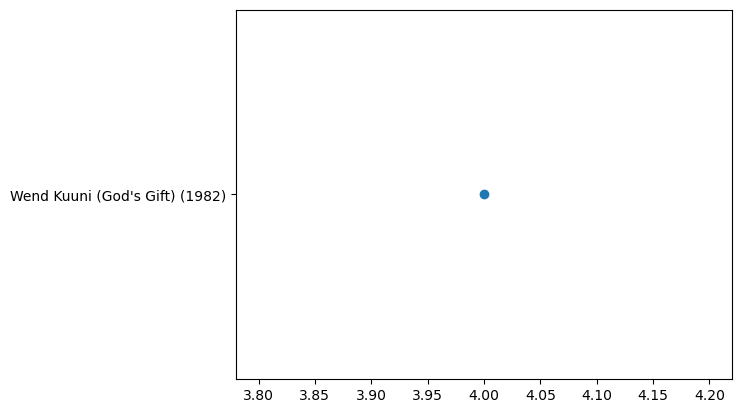

In [129]:
#Find the ratings for the movie reviewed by for a particular user of user id = 765

res = data[data.UserID == 765]

plt.scatter(y=res.MovieName, x=res.Ratings)

res

<Axes: ylabel='MovieName'>

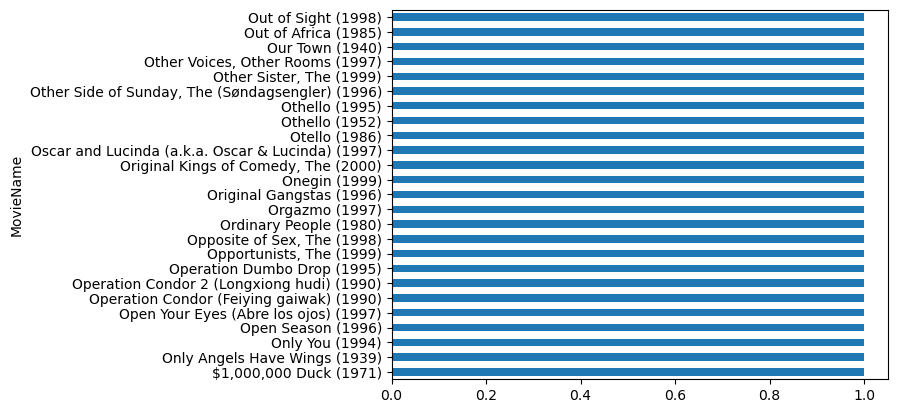

In [115]:
#Top 25 movies by viewership rating

res = data.groupby("MovieName").size().sort_values(ascending=False)[:25]
plt.ylabel("Title")
plt.xlabel("Viewership Count")
res.plot(kind="barh")
#res

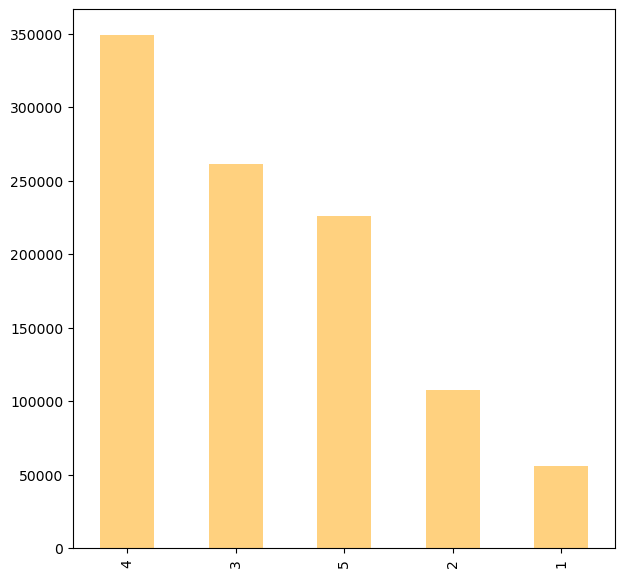

In [112]:
#The top 25 movies by viewership rating
top_25 = data[25:]
top_25['Ratings'].value_counts().plot(kind='bar',alpha=0.5,figsize=(7,7), color='orange')
plt.show()

In [101]:
# Rating data by user id 50
uid50 = groupedby_uid.get_group(50)
uid50[['UserID', 'Ratings']]

,UserID,Ratings
48,50.0,4


## Machine Learning on first 500 extracted records

<img src ="https://media.giphy.com/media/4TtTVTmBoXp8txRU0C/giphy.gif">

In [168]:
import warnings
warnings.filterwarnings('ignore')

#First 500 extracted records
first_500 = data[500:]
first_500.dropna(inplace=True)

In [132]:
#Use the following features:movie id,age,occupation
features = first_500[['MovieID','Age','Occupation']].values

In [133]:
#Use rating as label
labels = first_500[['Ratings']].values

In [187]:
#Create train and test data set
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

## Regression Techniques

### Logistic Regression

In [188]:
logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

32.76

### Support Vector Machines

In [189]:
svc = SVC()
svc.fit(train, train_labels)
Y_pred = svc.predict(test)
acc_svc = round(svc.score(train, train_labels) * 100, 2)
acc_svc

32.94

### K Nearest Neighbors Classifier

In [190]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
acc_knn

57.31

### Gaussian Naive Bayes

In [191]:
gaussian = GaussianNB()
gaussian.fit(train, train_labels)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(train, train_labels) * 100, 2)
acc_gaussian

32.23

### Perceptron

In [192]:
perceptron = Perceptron()
perceptron.fit(train, train_labels)
Y_pred = perceptron.predict(test)
acc_perceptron = round(perceptron.score(train, train_labels) * 100, 2)
acc_perceptron

28.61

### Linear SVC

In [193]:
linear_svc = LinearSVC()
linear_svc.fit(train, train_labels)
Y_pred = linear_svc.predict(test)
acc_linear_svc = round(linear_svc.score(train, train_labels) * 100, 2)
acc_linear_svc

23.53

### Stochastic Gradient Descent

In [194]:
sgd = SGDClassifier()
sgd.fit(train, train_labels)
Y_pred = sgd.predict(test)
acc_sgd = round(sgd.score(train, train_labels) * 100, 2)
acc_sgd

5.87

### Decision Tree

In [195]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

98.54

### Random Forest

In [196]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
acc_random_forest

98.54

## Models' Score

In [197]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.54
8,Decision Tree,98.54
1,KNN,57.31
0,Support Vector Machines,32.94
2,Logistic Regression,32.76
4,Naive Bayes,32.23
5,Perceptron,28.61
7,Linear SVC,23.53
6,Stochastic Gradient Decent,5.87


### The Best One is : Random Forest Regressor